<a href="https://colab.research.google.com/github/nedokormysh/GB_Probability_Theory/blob/lesson7/Probability_Theory_HW_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

**Задание 1.**

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

$$y = a + bx$$
$$ks = a + b \cdot zp$$

$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2} = \frac{\overline{zp \cdot {ks}}-\overline{ks} \cdot \overline{zp}}{\overline{zp^2} - \overline{zp}^2};$$

$$a = \overline{y} - b \cdot {\overline{x}} = \overline{ks} - b \cdot \overline{zp}$$

$$\widehat{ks} = a + b \cdot zp$$

$$a = 444.177$$
$$b = 2.621$$

In [ ]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

zp = np.array(zp)
ks = np.array(ks)

b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp)**2)
# a = np.mean(ks) - b * np.mean(zp)
a = ks.mean() - b * zp.mean()
ks_hat = a + b * zp

mse = ((ks - ks_hat)**2).sum() / len(ks) 
print(f'b = {round(b, 3)}')
print(f'a = {round(a, 3)}')
print(f'mse = {round(mse, 3)}')

b = 2.621
a = 444.177
mse = 6470.414


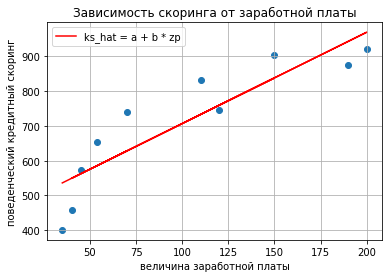

In [ ]:
plt.scatter(zp, ks)
# plt.plot(zp, ks)
plt.plot(zp, ks_hat, c = 'r', label = 'ks_hat = a + b * zp')
plt.xlabel('величина заработной платы')
plt.ylabel('поведенческий кредитный скоринг')
plt.title('Зависимость скоринга от заработной платы')
plt.legend()
plt.grid()
plt.show()

**Матричный метод без интерсепта.**

In [ ]:
ZP = zp.reshape(10, 1)
ZP

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [ ]:
KS = ks.reshape(10, 1)
KS

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [ ]:
B = np.dot(np.linalg.inv(np.dot(ZP.T, ZP)), ZP.T @ KS)
print(B)

[[5.88982042]]


$$y = \beta_0 + \beta_1 \cdot x$$

Т.к. мы решаем без интерсепта, то получаем уравнение.
$$y = \beta_1 \cdot x$$
$$\beta_1 = 5.889$$

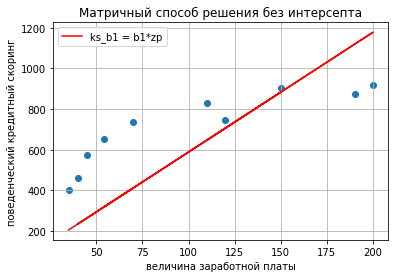

In [ ]:
b1 = 5.889
ks_b1 = b1 * zp 

plt.scatter(zp, ks)
# plt.plot(zp, ks)
plt.plot(zp, ks_b1, c = 'r', label = 'ks_b1 = b1*zp')
plt.xlabel('величина заработной платы')
plt.ylabel('поведенческий кредитный скоринг')
plt.title('Матричный способ решения без интерсепта')
plt.legend()
plt.grid()
plt.show()

**Матричный метод с интерсептом.**

$$y = \beta_0 + \beta_1 \cdot x$$

$$\beta_0 = 444.17$$
$$\beta_1 = 2.62$$

In [ ]:
ZP = np.hstack([np.ones((10, 1)), ZP])

B = np.dot(np.linalg.inv(np.dot(ZP.T, ZP)),ZP.T @KS)
print(B)

[[444.17735732]
 [  2.62053888]]


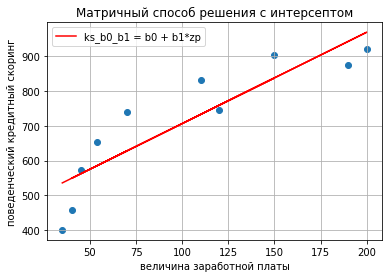

In [ ]:
b0 = 444.17
b1 = 2.62
ks_b0_b1 =b0 + b1 * zp 

plt.scatter(zp, ks)

plt.plot(zp, ks_b0_b1, c = 'r', label = 'ks_b0_b1 = b0 + b1*zp')
plt.xlabel('величина заработной платы')
plt.ylabel('поведенческий кредитный скоринг')
plt.title('Матричный способ решения с интерсептом')
plt.legend()
plt.grid()
plt.show()

**Задание 2.**

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [ ]:
B1 = 0.1
alpha = 1e-6
# alpha = 0.00000000000001
n = 10
# print(alpha)

In [ ]:
def mse_(B1, y = ks, X = zp, n = 10):
    return np.sum((B1 * X - y) ** 2) / n
# print(mse())

In [ ]:
for i in range (300):
    B1 -= alpha * (2 / n) * np.sum((B1 * zp - ks) * zp)
    # print(f'Iteration: {i}, B1 = {B1}, mse = {mse_(B1)}')
    if i % 30 == 0:
        print(f'Iteration: {i}, B1 = {B1}, mse = {mse_(B1)}')

Iteration: 0, B1 = 0.25952808, mse = 493237.7212546963
Iteration: 30, B1 = 3.4547782236263824, mse = 138204.25062502263
Iteration: 60, B1 = 4.836690291080364, mse = 71796.25222021657
Iteration: 90, B1 = 5.434352720103083, mse = 59374.825462025976
Iteration: 120, B1 = 5.692835432193034, mse = 57051.433003054815
Iteration: 150, B1 = 5.804626485478126, mse = 56616.849068093856
Iteration: 180, B1 = 5.852974939784972, mse = 56535.56138215128
Iteration: 210, B1 = 5.873885137561711, mse = 56520.35675226433
Iteration: 240, B1 = 5.882928578088004, mse = 56517.512769595625
Iteration: 270, B1 = 5.8868397709626885, mse = 56516.98081074626


**Задание 3.**

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Потребуется найти 2 производные: одна по $\beta_0$, вторая по $\beta_1$

In [ ]:
B0 = 0.1
B1 = 0.1
alpha = 1e-5
n = 10

def mse_(B0, B1, y = ks, X = zp, n = 10):
    return np.sum((B0 + B1 * X - y) ** 2) / n

for i in range (2500000):
    B0 -= alpha * (2 / n) * np.sum((B0 + B1 * zp - ks))
    B1 -= alpha * (2 / n) * np.sum((B0 +B1 * zp - ks) * zp)
    if i % 100000 == 0:
        print(f'Iteration: {i}, B0 = {B0} B1 = {B1}, mse = {mse_(B0, B1)}')

Iteration: 0, B0 = 0.1139932 B1 = 1.6950496217904003, mse = 298808.66922912706
Iteration: 100000, B0 = 176.8199005170983 B1 = 4.588397987371905, mse = 24602.38444530712
Iteration: 200000, B0 = 283.19812633817304 B1 = 3.805411184788063, mse = 13043.966032682154
Iteration: 300000, B0 = 347.2497716180555 B1 = 3.333965148244051, mse = 8853.585092132746
Iteration: 400000, B0 = 385.816059327739 B1 = 3.05010165956241, mse = 7334.4073119145005
Iteration: 500000, B0 = 409.03729808290353 B1 = 2.8791839426649335, mse = 6783.645660253098
Iteration: 600000, B0 = 423.01909309994124 B1 = 2.776272271688333, mse = 6583.972915633631
Iteration: 700000, B0 = 431.4377047838163 B1 = 2.714307881949033, mse = 6511.583698222517
Iteration: 800000, B0 = 436.506654986377 B1 = 2.676998356612191, mse = 6485.339761888725
Iteration: 900000, B0 = 439.5587325878761 B1 = 2.6545338300233094, mse = 6475.825303535319
Iteration: 1000000, B0 = 441.3964262548758 B1 = 2.6410076607593775, mse = 6472.375938447427
Iteration: 1100